Apple or banana Classification(With KNN)

- Apple width 6
- Apple length6
- Banana width 4
- Banana length 8

Apple = 0

Banana = 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
def generate_dataset(n):
    apple_width = np.random.normal(6, 1, n)
    apple_length = np.random.normal(6, 1, n)
    banana_width = np.random.normal(4, 1, n)
    banana_length = np.random.normal(8, 1, n)
    
    width = np.concatenate((apple_width, banana_width))
    length = np.concatenate((apple_length, banana_length))
    x = np.array([width,length]).T # T = transpose rows and cols
    
    y_apples = np.zeros(n, dtype=int)
    y_bananas = np.ones(n, dtype=int)
    y = np.concatenate((y_apples, y_bananas))
    return x, y

In [4]:
X_train, Y_train = generate_dataset(100)

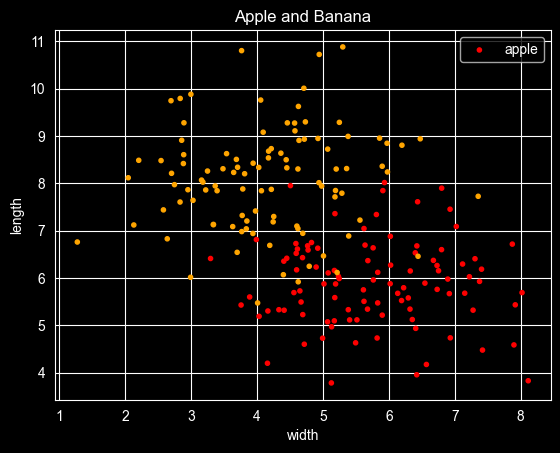

In [5]:
cmap = ["red", "orange"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=ListedColormap(cmap), marker='.', label='apple')
# plt.scatter(banana_width, banana_length, c='orange', marker='.', label='banana')
plt.title('Apple and Banana')
plt.xlabel('width')
plt.ylabel('length')
plt.legend()
plt.show()

In [6]:
class KNN:
    def __init__(self, k):
        self.k = k

    # Training
    def fit(self, x, y):
        self.X_train = x
        self.Y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)** 2))

    def predict(self, X):
        Y = []
        for x in X:
            distances = []
            for x_train in self.X_train:
                d = self.euclidean_distance(x, x_train)
                distances.append(d)

            nearest_neighbors = np.argsort(distances)[0:self.k]
            result = np.bincount(self.Y_train[nearest_neighbors])
            y = np.argmax(result)
            Y.append(y)
        return Y

    def evaluate(self, X, Y):
        Y_pred = self.predict(X)
        accuracy = np.sum(Y_pred == Y) / len(Y)
        return accuracy


In [25]:
knn = KNN(5)
knn.fit(X_train, Y_train)

In [13]:
# new_fruit = np.array([5.5, 7])
# new_fruit_2 = np.array([1, 7])
# new_fruit_3 = np.array([7, 5])
# new_fruit_4 = np.array([3, 7])
#
# new_fruits = [new_fruit, new_fruit_2, new_fruit_3, new_fruit_4]
# outputs = knn.predict(new_fruits)

In [14]:
for output in outputs:
    if output == 0:
        print("It's an apple")
    else:
        print("It's a banana")

It's an apple
It's a banana
It's an apple
It's a banana


In [26]:
X_test, Y_test = generate_dataset(1000)
knn.evaluate(X_test, Y_test)

Y_pred = knn.predict(X_test)

In [27]:
confusion_matrix = np.zeros([2, 2])

for i in range(100):
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][0] += 1

confusion_matrix

array([[97.,  0.],
       [ 0.,  3.]])

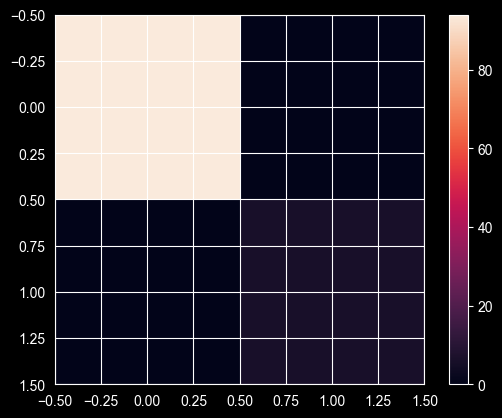

In [17]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier

skknn = KNeighborsClassifier(n_neighbors=5)
skknn.fit(X_train, Y_train)
skknn.score(X_test, Y_test)

0.926

In [29]:
knn.evaluate(X_test, Y_test)

np.float64(0.926)